In [1]:
import numpy as np   # type: ignore
import pandas as pd   # type: ignore
  
import matplotlib.pyplot as plt   # type: ignore
import plotly.express as px   # type: ignore
from plotly.offline import init_notebook_mode, iplot   # type: ignore
init_notebook_mode(connected=True)  
  
from sklearn.decomposition import PCA  # type: ignore
  
from sklearn. preprocessing import StandardScaler  # type: ignore
from sklearn.model_selection import train_test_split  # type: ignore
from sklearn.model_selection import cross_val_score  # type: ignore
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # type: ignore
  
from sklearn.metrics import accuracy_score  # type: ignore
from sklearn.metrics import precision_score, recall_score, f1_score  # type: ignore
  
import pickle  

### Reading DATASET

In [2]:
dataframe = pd.read_csv('college_place.csv')

### Getting to know the shape of the dataset (rows,columns)

In [3]:
dataframe.shape

(2966, 8)

### Showing first 5 rows of the dataset

In [4]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


### Showing 4 rows of the dataset at random

In [5]:
dataframe.sample(4)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
757,24,Male,Mechanical,0,6,1,0,1
1618,22,Male,Information Technology,2,7,1,0,0
2063,21,Male,Electrical,1,8,0,0,1
2373,19,Male,Mechanical,1,7,1,0,0


### Getting to know the data typs of the columns that are in the dataset

In [6]:
dataframe.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

### getting to know the detailed information of the columns

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


### Statistical Descriptions of the numerical values in the dataset

In [8]:
dataframe.describe

<bound method NDFrame.describe of       Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8       1   
1      21  Female               Computer Science            0     7       1   
2      22  Female         Information Technology            1     6       0   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23    Male         Information Technology            0     7       0   
2962   23    Male                     Mechanical            1     7       1   
2963   22    Male         Information Technology            1     7       0   
2964   22    Male               Computer Science            1     7       0   
2965   23    Male                          Civil            0     8       0   

      HistoryOfBa

# Pre processing phase

### 1. Checing for the missing values

In [9]:
dataframe.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

### 2. Removal of the duplicate values

In [10]:
#Duplicate rows check
#print(dataframe.duplicated().sum())

#removal of duplicate rows
#dataframe.drop_duplicates(inplace=True)

#### checking if the duplicate rows are removed or not

In [11]:
print(dataframe.duplicated().sum())

1829


# EDA

### Exploratory data analysis is an important stage in machine learning, which involves examining and visualizing the data to learn more about its composition, traits, and trends. It is carried out prior to developing the actual machine learning model and is crucial for spotting possible difficulties and choosing the right preprocessing and feature engineering strategies.

In [12]:
figure = px.scatter(dataframe, x="CGPA", y="Internships", color="PlacedOrNot",  
                 hover_data=['CGPA'])  
figure.show()

### Plotting Histogram for the count of place and not placed

In [13]:
px.histogram(dataframe, x='PlacedOrNot', color='PlacedOrNot', barmode='group')  

### Pie Chart: Percentage pie chart of placed or not Placed

In [14]:
figure = px.pie(dataframe, values=dataframe['PlacedOrNot'].value_counts().values, names=dataframe['PlacedOrNot'].value_counts().index, title='Placed Vs Not Placed')  
figure.show()  

### Printing the age of the youngest and Eldest student who is placed

In [15]:
print("Max Age of Placed Person: ",dataframe[(dataframe['Age'] == dataframe['Age'].max()) & (dataframe['PlacedOrNot']==1)]['Age'].values[0])  
print("Min Age of Placed Person: ",dataframe[(dataframe['Age'] == dataframe['Age'].min()) & (dataframe['PlacedOrNot']==1)]['Age'].values[0])  

Max Age of Placed Person:  30
Min Age of Placed Person:  19


### Printing the Maximum and the Minimum number of internships done by the student who is placed.   
### We will also print the Maximum and Minimum number of students who did the max internship and the minimum number of internships.  

In [16]:
print("Max Internships Done by the Placed Student: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].max()) & (dataframe['PlacedOrNot']==1)]['Internships'].values[0])  
print("No of students who did max Internships and are placed: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].max()) & (dataframe['PlacedOrNot']==1)]['Internships'].value_counts().values[0])  
  
print("Min Internships Done by the Placed Person: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].min()) & (dataframe['PlacedOrNot']==1)]['Internships'].values[0])  
print("No of students who did min Internships and are placed: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].min()) & (dataframe['PlacedOrNot']==1)]['Internships'].value_counts().values[0])  

Max Internships Done by the Placed Student:  3
No of students who did max Internships and are placed:  41
Min Internships Done by the Placed Person:  0
No of students who did min Internships and are placed:  654


### Printing the Maximum and Minimum number of CGPA obtained by the student who is placed.  
### We will also print the Maximum and the Minimum number of students who got the max CGPA and minimum CGPA who are placed.  
  

In [17]:
print("Max CGPA of Placed Student: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].max()) & (dataframe['PlacedOrNot']==1)]['CGPA'].values[0])  
print("No of students has max CGPA and are placed: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].max()) & (dataframe['PlacedOrNot']==1)]['CGPA'].value_counts().values[0])  
  
print("Min CGPA of Placed Person: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].min()) & (dataframe['PlacedOrNot']==1)]['CGPA'].values[0])  
print("No of students has min CGPA and are placed: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].min()) & (dataframe['PlacedOrNot']==1)]['CGPA'].value_counts().values[0])  

Max CGPA of Placed Student:  9
No of students has max CGPA and are placed:  165
Min CGPA of Placed Person:  5
No of students has min CGPA and are placed:  7


# Representation phase
### The process of statistical representation involves using statistical measures and visualizations to present data in a meaningful and understandable manner with the main objective of enabling the user to understand insights and patterns in the data and make well-informed decisions using the data.

In [18]:
figure = px.box(dataframe, y='CGPA')  
figure.show()  

In [19]:
figure = px.box(dataframe, y='Age')  
figure.show()  

In [20]:
figure = px.box(dataframe, y=['Internships','CGPA', 'Age'])  
figure.show()  

# Encoding Categorical to Numerical
### In machine learning, encoding categorical variables to numeric variables is a typical preprocessing step. It requires changing a qualitative attribute-representing category variable into a numerical variable that may be employed in mathematical operations and models.

### 1. Converting gender column

In [21]:
dataframe['Gender'] = dataframe['Gender'].map({'Male': 1, 'Female': 0})  

### 2. Converting Stream column

In [22]:
dataframe['Stream'].unique()  

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [23]:
dataframe['Stream'] = dataframe['Stream'].map({'Electronics And Communication': 1,  
                                 'Computer Science': 2,  
                                'Information Technology': 3,  
                                'Mechanical':4,  
                                'Electrical':5,  
                                'Civil':6})  

### Checking the changes

In [24]:
dataframe.sample(5)  

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1973,20,1,6,1,8,0,0,1
2239,21,0,4,1,6,0,0,0
2963,22,1,3,1,7,0,0,0
784,21,1,2,1,8,0,0,1
2318,21,1,3,0,7,0,0,0


### Extracting Input and Output Columns

In [25]:
dataframe.corr()['PlacedOrNot']

Age                  0.046943
Gender              -0.006705
Stream              -0.081742
Internships          0.179334
CGPA                 0.588648
Hostel              -0.038182
HistoryOfBacklogs   -0.022337
PlacedOrNot          1.000000
Name: PlacedOrNot, dtype: float64

In [26]:
X = dataframe.iloc[:,0:7]  
y = dataframe.iloc[:,-1]  
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,1,1,8,1,1
1,21,0,2,0,7,1,1
2,22,0,3,1,6,0,0
3,21,1,3,0,8,0,1
4,22,1,4,0,8,1,0
...,...,...,...,...,...,...,...
2961,23,1,3,0,7,0,0
2962,23,1,4,1,7,1,0
2963,22,1,3,1,7,0,0
2964,22,1,2,1,7,0,0


### Getting the shape of the X and Y

In [27]:
print(X.shape)  
print(y.shape)  


(2966, 7)
(2966,)


### Splitting the dataset into training and testing dataset  (70% training and 30% testing)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30) 

### Getting the Shape of all the training and testing dataset  

In [29]:
print(X_train.shape)  
print(X_test.shape)  
print(y_train.shape)  
print(y_test.shape)  

(2076, 7)
(890, 7)
(2076,)
(890,)


In [30]:
scaler = StandardScaler()  
X_train_scale = scaler.fit_transform(X_train)  
X_test_scale = scaler.transform(X_test)  

# Training and Evaluating the model
### Training and evaluating the model are the two critical steps in machine learning that determine the accuracy and performance of the model. These steps require careful planning, attention to detail, and rigorous evaluation to develop a model that can generalize well to new, unseen data.

### Here will go with different machine learning algorithms and find their accuracy.

### Creating of a new dataframe named ComparativeStudyTable which keeps the record of the accuracy values of different values


In [31]:
import pandas as pd
comparativeStudyTable=pd.DataFrame(columns=['Model','Without Scaling and Without CV','Without Scaling and With CV','With Scaling Without CV','With Scaling and With CV'])
print(comparativeStudyTable)


Empty DataFrame
Columns: [Model, Without Scaling and Without CV, Without Scaling and With CV, With Scaling Without CV, With Scaling and With CV]
Index: []


## 1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()  
  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)  

comparativeStudyTable.loc[0] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[0,'Model']='Logistic Regression'
comparativeStudyTable.loc[0,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[0,'Without Scaling and With CV']=without_scaling_with_cv*100
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[0,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[0,'With Scaling and With CV']=with_scaling_with_cv*100







Without Scaling and Without CV:  0.7325842696629213
Without Scaling and With CV:  0.7692586399108138
With Scaling and Without CV:  0.7325842696629213
With Scaling and With CV:  0.7692586399108138


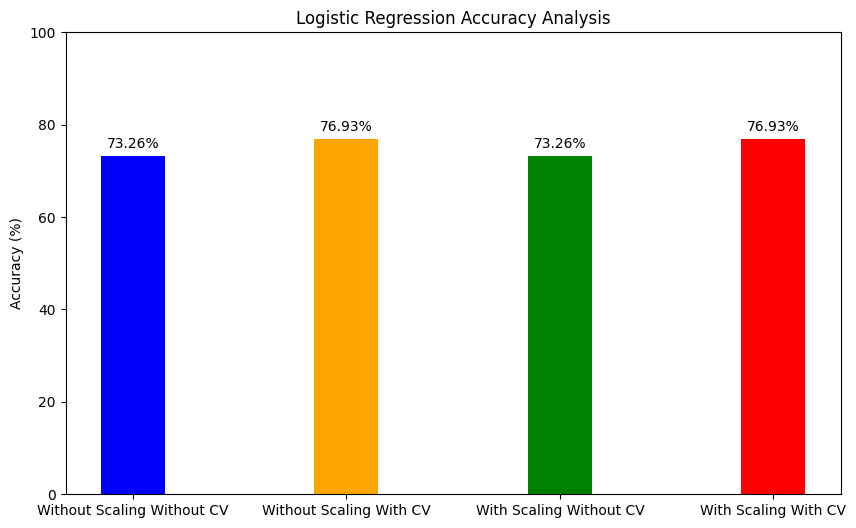

In [33]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']

accuracy_values = [comparativeStudyTable.loc[0, 'Without Scaling and Without CV'],comparativeStudyTable.loc[0, 'Without Scaling and With CV'],comparativeStudyTable.loc[0, 'With Scaling Without CV'],comparativeStudyTable.loc[0, 'With Scaling and With CV']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

plt.title('Logistic Regression Accuracy Analysis')
plt.ylabel('Accuracy (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
plt.ylim(0, 100)
plt.show()

## 2. Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier(random_state=0)  
  
#without scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[1] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[1,'Model']='Decision Tree'
comparativeStudyTable.loc[1,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[1,'Without Scaling and With CV']=without_scaling_with_cv*100

  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[1,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[1,'With Scaling and With CV']=with_scaling_with_cv*100

Without Scaling and Without CV:  0.8719101123595505
Without Scaling and With CV:  0.8795661464139725
With Scaling and Without CV:  0.8719101123595505
With Scaling and With CV:  0.880049238201412


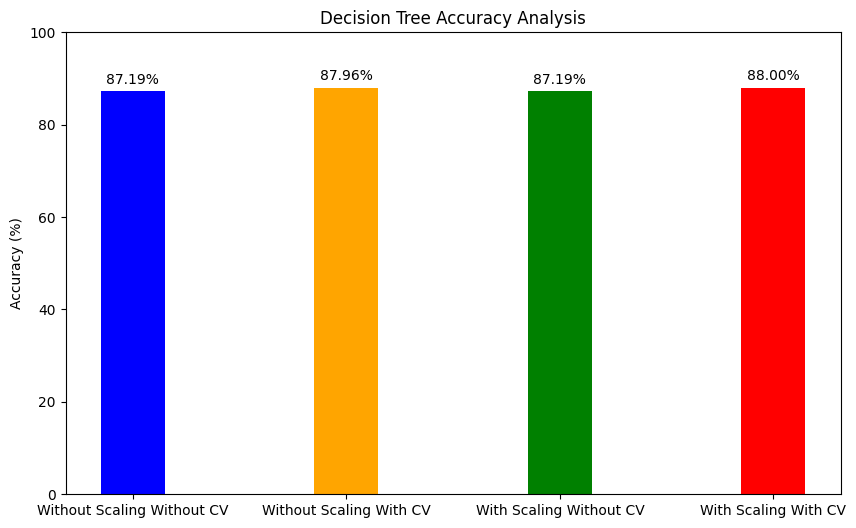

In [35]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']

accuracy_values = [comparativeStudyTable.loc[1, 'Without Scaling and Without CV'],comparativeStudyTable.loc[1, 'Without Scaling and With CV'],comparativeStudyTable.loc[1, 'With Scaling Without CV'],comparativeStudyTable.loc[1, 'With Scaling and With CV']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

plt.title('Decision Tree Accuracy Analysis')
plt.ylabel('Accuracy (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
    
plt.ylim(0, 100)
plt.show()

## 3. Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier  #type: ignore
  
classifier = RandomForestClassifier(max_depth=10, random_state=0)  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[2] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[2,'Model']='Random Forest'
comparativeStudyTable.loc[2,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[2,'Without Scaling and With CV']=without_scaling_with_cv*100
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[2,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[2,'With Scaling and With CV']=with_scaling_with_cv*100 

Without Scaling and Without CV:  0.8741573033707866
Without Scaling and With CV:  0.8747514864362691
With Scaling and Without CV:  0.8741573033707866
With Scaling and With CV:  0.8752345782237088


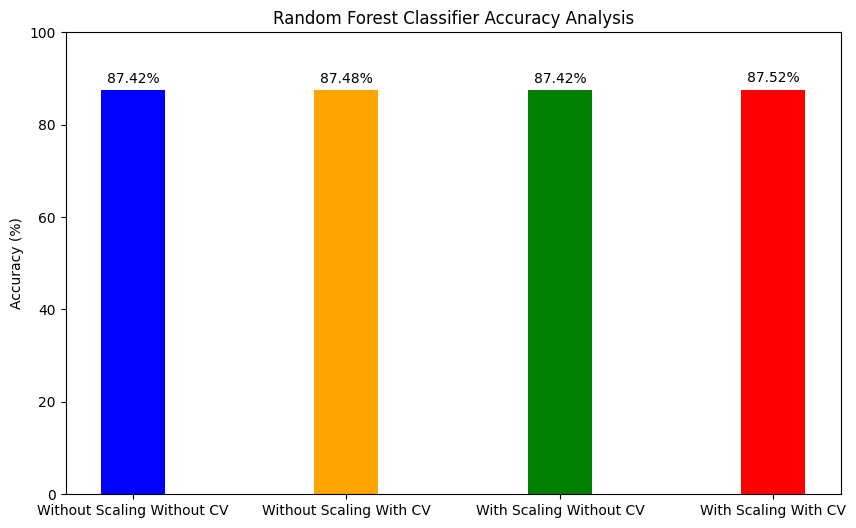

In [37]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']

accuracy_values = [comparativeStudyTable.loc[2, 'Without Scaling and Without CV'],comparativeStudyTable.loc[2, 'Without Scaling and With CV'],comparativeStudyTable.loc[2, 'With Scaling Without CV'],comparativeStudyTable.loc[2, 'With Scaling and With CV']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

plt.title('Random Forest Classifier Accuracy Analysis')
plt.ylabel('Accuracy (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
    
plt.ylim(0, 100)
plt.show()

## 4. Support Vector Machines

In [38]:
from sklearn.svm import SVC  #type: ignore
  
svc = SVC()  
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}  
classifier = GridSearchCV(svc, parameters)   
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[3] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[3,'Model']='Support Vector Classifier'
comparativeStudyTable.loc[3,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[3,'Without Scaling and With CV']=without_scaling_with_cv*100
  
  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[3,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[3,'With Scaling and With CV']=with_scaling_with_cv*100


Without Scaling and Without CV:  0.7696629213483146
Without Scaling and With CV:  0.8020113340765516
With Scaling and Without CV:  0.8617977528089887
With Scaling and With CV:  0.8617614269788183


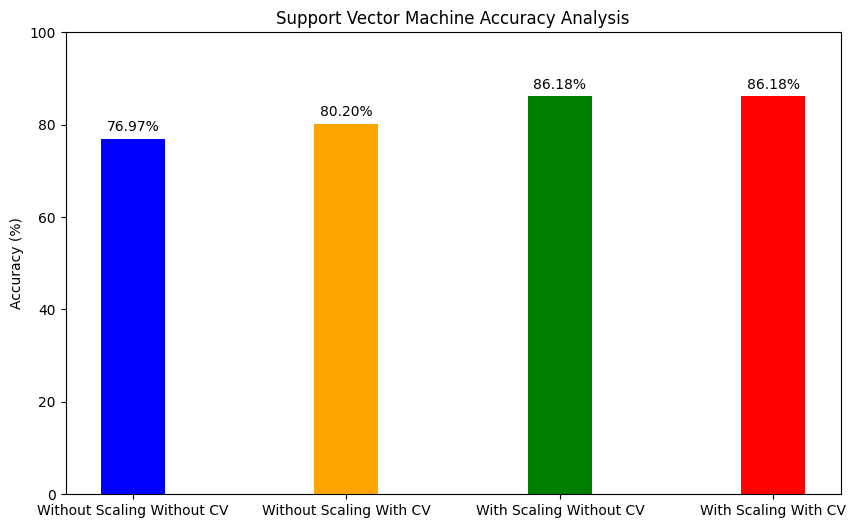

In [39]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']

accuracy_values = [comparativeStudyTable.loc[3, 'Without Scaling and Without CV'],comparativeStudyTable.loc[3, 'Without Scaling and With CV'],comparativeStudyTable.loc[3, 'With Scaling Without CV'],comparativeStudyTable.loc[3, 'With Scaling and With CV']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

plt.title('Support Vector Machine Accuracy Analysis')
plt.ylabel('Accuracy (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
    
plt.ylim(0, 100)
plt.show()

## 5. Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[4] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[4,'Model']='Gaussian Naive Bayes'
comparativeStudyTable.loc[4,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[4,'Without Scaling and With CV']=without_scaling_with_cv*100
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[4,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[4,'With Scaling and With CV']=with_scaling_with_cv*100


Without Scaling and Without CV:  0.7797752808988764
Without Scaling and With CV:  0.8058667781493869
With Scaling and Without CV:  0.7797752808988764
With Scaling and With CV:  0.8058667781493869


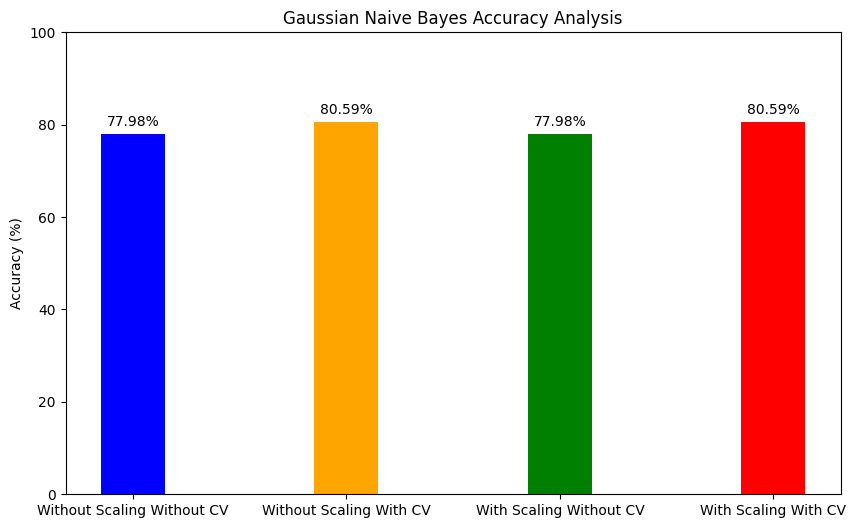

In [41]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']

accuracy_values = [comparativeStudyTable.loc[4, 'Without Scaling and Without CV'],comparativeStudyTable.loc[4, 'Without Scaling and With CV'],comparativeStudyTable.loc[4, 'With Scaling Without CV'],comparativeStudyTable.loc[4, 'With Scaling and With CV']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

plt.title('Gaussian Naive Bayes Accuracy Analysis')
plt.ylabel('Accuracy (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
    
plt.ylim(0, 100)
plt.show()

In [42]:
from sklearn.naive_bayes import MultinomialNB  
classifier = MultinomialNB()  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)
print("With Scaling and Without CV: ",62.12878)
print("With Scaling and With CV: ",61.898398)

comparativeStudyTable.loc[5] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[5,'Model']='Multinomial Naive Bayes'
comparativeStudyTable.loc[5,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[5,'Without Scaling and With CV']=without_scaling_with_cv*100

with_scaling_with_cv=62.12878
with_scaling_no_cv=61.898398
comparativeStudyTable.loc[5,'With Scaling Without CV']=with_scaling_no_cv
comparativeStudyTable.loc[5,'With Scaling and With CV']=with_scaling_with_cv




Without Scaling and Without CV:  0.6123595505617978
Without Scaling and With CV:  0.6314845782237087
With Scaling and Without CV:  62.12878
With Scaling and With CV:  61.898398


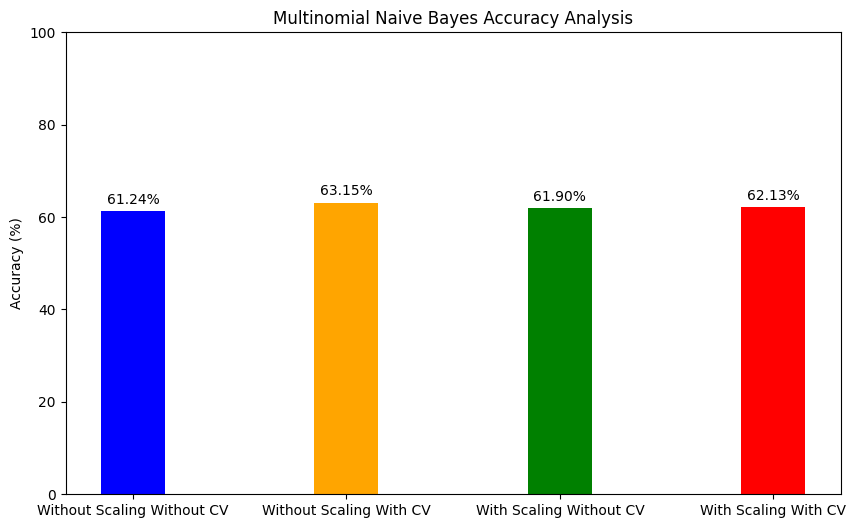

In [43]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']

accuracy_values = [comparativeStudyTable.loc[5, 'Without Scaling and Without CV'],comparativeStudyTable.loc[5, 'Without Scaling and With CV'],comparativeStudyTable.loc[5,'With Scaling Without CV'],comparativeStudyTable.loc[5,'With Scaling and With CV']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

plt.title('Multinomial Naive Bayes Accuracy Analysis')
plt.ylabel('Accuracy (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
    
plt.ylim(0, 100)
plt.show()

In [44]:
from sklearn.naive_bayes import BernoulliNB  
classifier = BernoulliNB()  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[6] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[6,'Model']='Bernoulli Naive Bayes'
comparativeStudyTable.loc[6,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[6,'Without Scaling and With CV']=without_scaling_with_cv*100
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[6,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[6,'With Scaling and With CV']=with_scaling_with_cv*100

  

Without Scaling and Without CV:  0.5460674157303371
Without Scaling and With CV:  0.547185061315496
With Scaling and Without CV:  0.7887640449438202
With Scaling and With CV:  0.8212978446674098


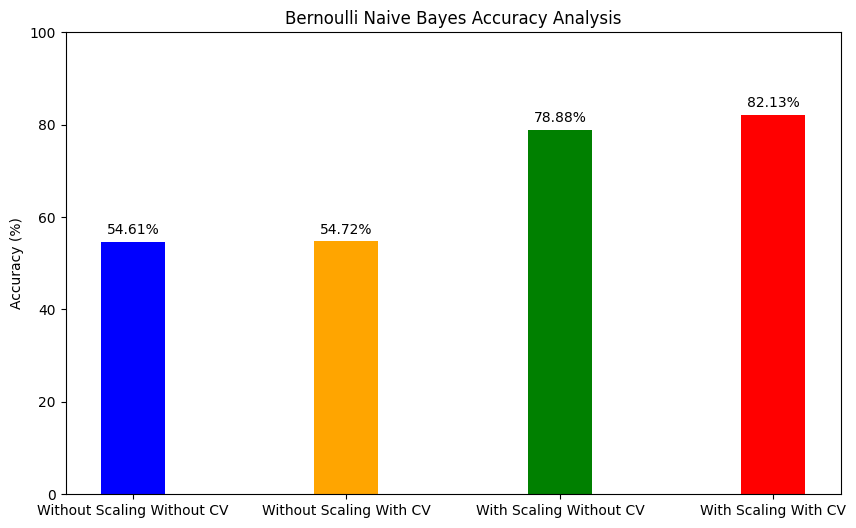

In [45]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']

accuracy_values = [comparativeStudyTable.loc[6, 'Without Scaling and Without CV'],comparativeStudyTable.loc[6, 'Without Scaling and With CV'],comparativeStudyTable.loc[6, 'With Scaling Without CV'],comparativeStudyTable.loc[6, 'With Scaling and With CV']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

plt.title('Bernoulli Naive Bayes Accuracy Analysis')
plt.ylabel('Accuracy (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
    
plt.ylim(0, 100)
plt.show()

## 6. KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[7] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[7,'Model']='k-Nearest Neighbour'
comparativeStudyTable.loc[7,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[7,'Without Scaling and With CV']=without_scaling_with_cv*100 
  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[7,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[7,'With Scaling and With CV']=with_scaling_with_cv*100
   

Without Scaling and Without CV:  0.8325842696629213
Without Scaling and With CV:  0.8453757896692679
With Scaling and Without CV:  0.8213483146067416
With Scaling and With CV:  0.8227355072463768


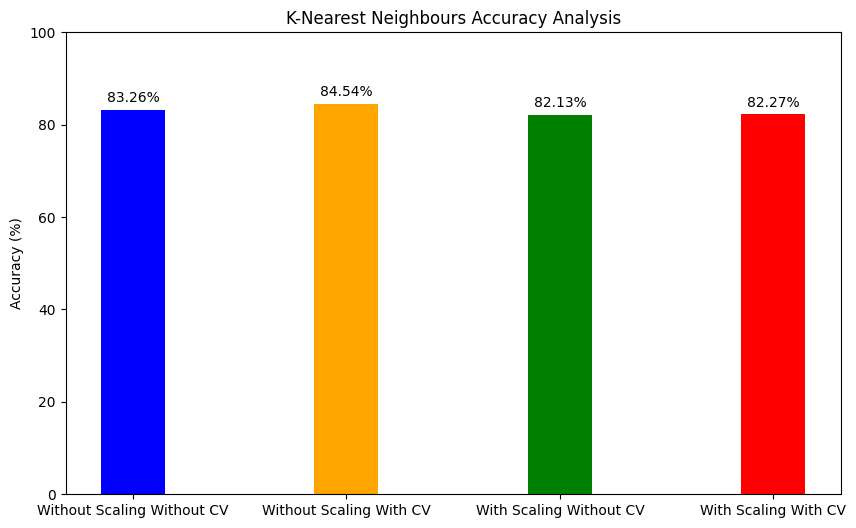

In [47]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']

accuracy_values = [comparativeStudyTable.loc[7, 'Without Scaling and Without CV'],comparativeStudyTable.loc[7, 'Without Scaling and With CV'],comparativeStudyTable.loc[7, 'With Scaling Without CV'],comparativeStudyTable.loc[7, 'With Scaling and With CV']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

plt.title('K-Nearest Neighbours Accuracy Analysis')
plt.ylabel('Accuracy (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
    
plt.ylim(0, 100)
plt.show()

## 7. SGD Classifier

In [48]:
from sklearn.linear_model import SGDClassifier  
classifier = SGDClassifier(max_iter=1000, tol=1e-3)  
  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[8] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[8,'Model']='Stochastic Gradient Descent'
comparativeStudyTable.loc[8,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[8,'Without Scaling and With CV']=without_scaling_with_cv*100   
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[8,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[8,'With Scaling and With CV']=with_scaling_with_cv*100

Without Scaling and Without CV:  0.7865168539325843
Without Scaling and With CV:  0.7268371423262727
With Scaling and Without CV:  0.7314606741573034
With Scaling and With CV:  0.7769834633965068


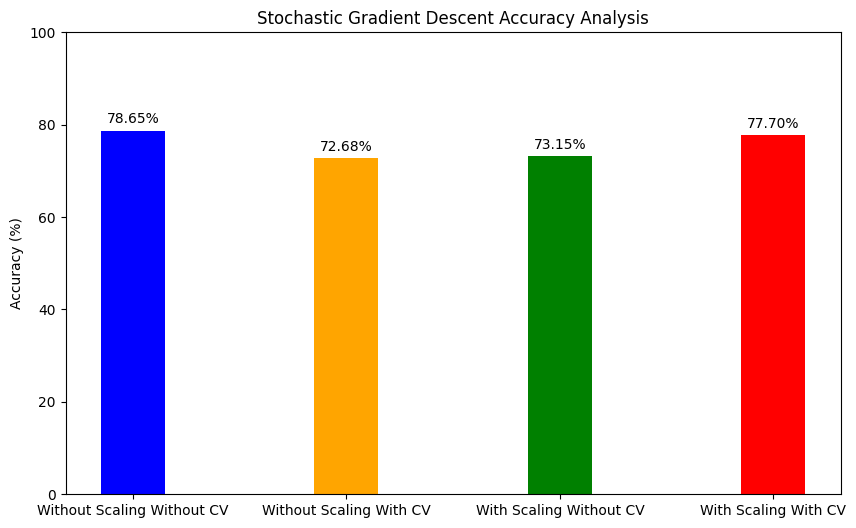

In [49]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']

accuracy_values = [comparativeStudyTable.loc[8, 'Without Scaling and Without CV'],comparativeStudyTable.loc[8, 'Without Scaling and With CV'],comparativeStudyTable.loc[8, 'With Scaling Without CV'],comparativeStudyTable.loc[8, 'With Scaling and With CV']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

plt.title('Stochastic Gradient Descent Accuracy Analysis')
plt.ylabel('Accuracy (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
    
plt.ylim(0, 100)
plt.show()

## 8. Perceptron 

In [50]:
from sklearn.linear_model import Perceptron  
  
classifier = Perceptron(tol=1e-3, random_state=0)  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[9] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[9,'Model']='Perceptron'
comparativeStudyTable.loc[9,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[9,'Without Scaling and With CV']=without_scaling_with_cv*100  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale) 
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[9,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[9,'With Scaling and With CV']=with_scaling_with_cv*100


Without Scaling and Without CV:  0.5528089887640449
Without Scaling and With CV:  0.6806391675956893
With Scaling and Without CV:  0.7044943820224719
With Scaling and With CV:  0.7115361389817911


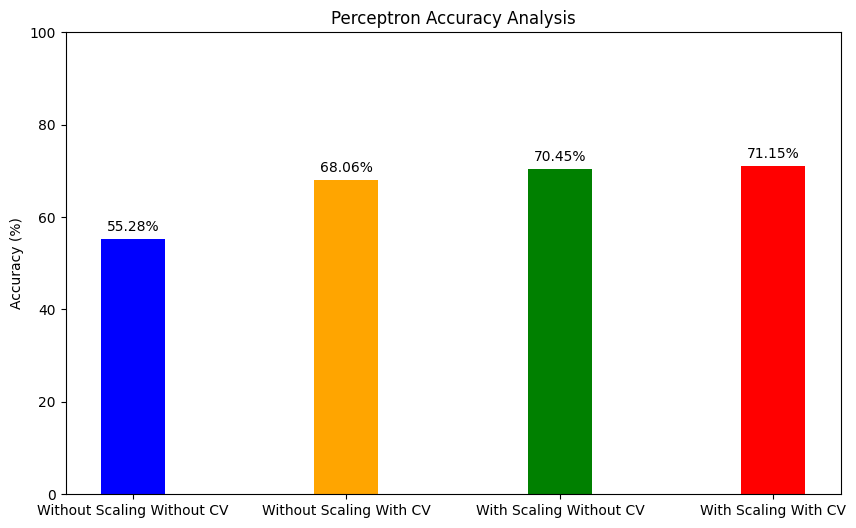

In [51]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']

accuracy_values = [comparativeStudyTable.loc[9, 'Without Scaling and Without CV'],comparativeStudyTable.loc[9, 'Without Scaling and With CV'],comparativeStudyTable.loc[9, 'With Scaling Without CV'],comparativeStudyTable.loc[9, 'With Scaling and With CV']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

plt.title('Perceptron Accuracy Analysis')
plt.ylabel('Accuracy (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
    
plt.ylim(0, 100)
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegressionCV  
classifier = LogisticRegressionCV(cv=5, random_state=0)  
  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[10] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[10,'Model']='Logistic regression CV'
comparativeStudyTable.loc[10,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[10,'Without Scaling and With CV']=without_scaling_with_cv*100 
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[10,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[10,'With Scaling and With CV']=with_scaling_with_cv*100


Without Scaling and Without CV:  0.7325842696629213


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Without Scaling and With CV:  0.7692586399108137
With Scaling and Without CV:  0.7325842696629213
With Scaling and With CV:  0.766857116313638


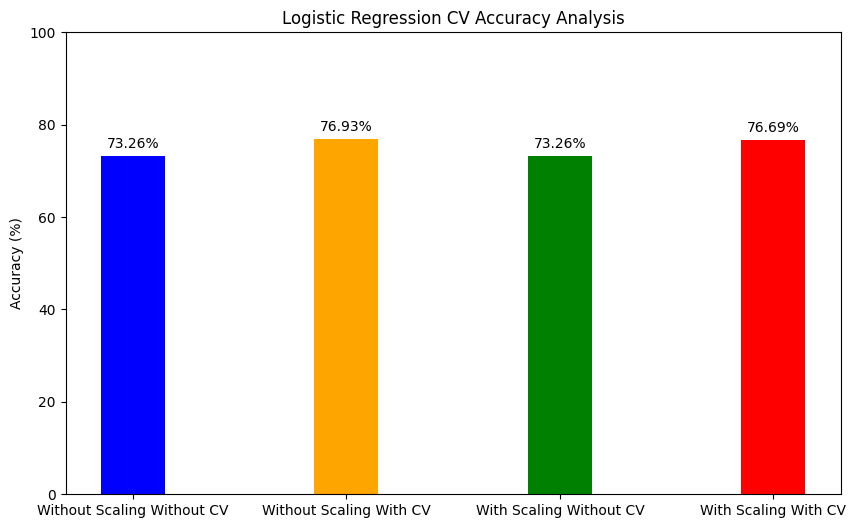

In [53]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']

accuracy_values = [comparativeStudyTable.loc[10, 'Without Scaling and Without CV'],comparativeStudyTable.loc[10, 'Without Scaling and With CV'],comparativeStudyTable.loc[10, 'With Scaling Without CV'],comparativeStudyTable.loc[10, 'With Scaling and With CV']]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

plt.title('Logistic Regression CV Accuracy Analysis')
plt.ylabel('Accuracy (%)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')
    
plt.ylim(0, 100)
plt.show()

In [54]:
comparativeStudyTable

,Model,Without Scaling and Without CV,Without Scaling and With CV,With Scaling Without CV,With Scaling and With CV
0,Logistic Regression,73.258427,76.925864,73.258427,76.925864
1,Decision Tree,87.191011,87.956615,87.191011,88.004924
2,Random Forest,87.41573,87.475149,87.41573,87.523458
3,Support Vector Classifier,76.966292,80.201133,86.179775,86.176143
4,Gaussian Naive Bayes,77.977528,80.586678,77.977528,80.586678
5,Multinomial Naive Bayes,61.235955,63.148458,61.898398,62.12878
6,Bernoulli Naive Bayes,54.606742,54.718506,78.876404,82.129784
7,k-Nearest Neighbour,83.258427,84.537579,82.134831,82.273551
8,Stochastic Gradient Descent,78.651685,72.683714,73.146067,77.698346
9,Perceptron,55.280899,68.063917,70.449438,71.153614


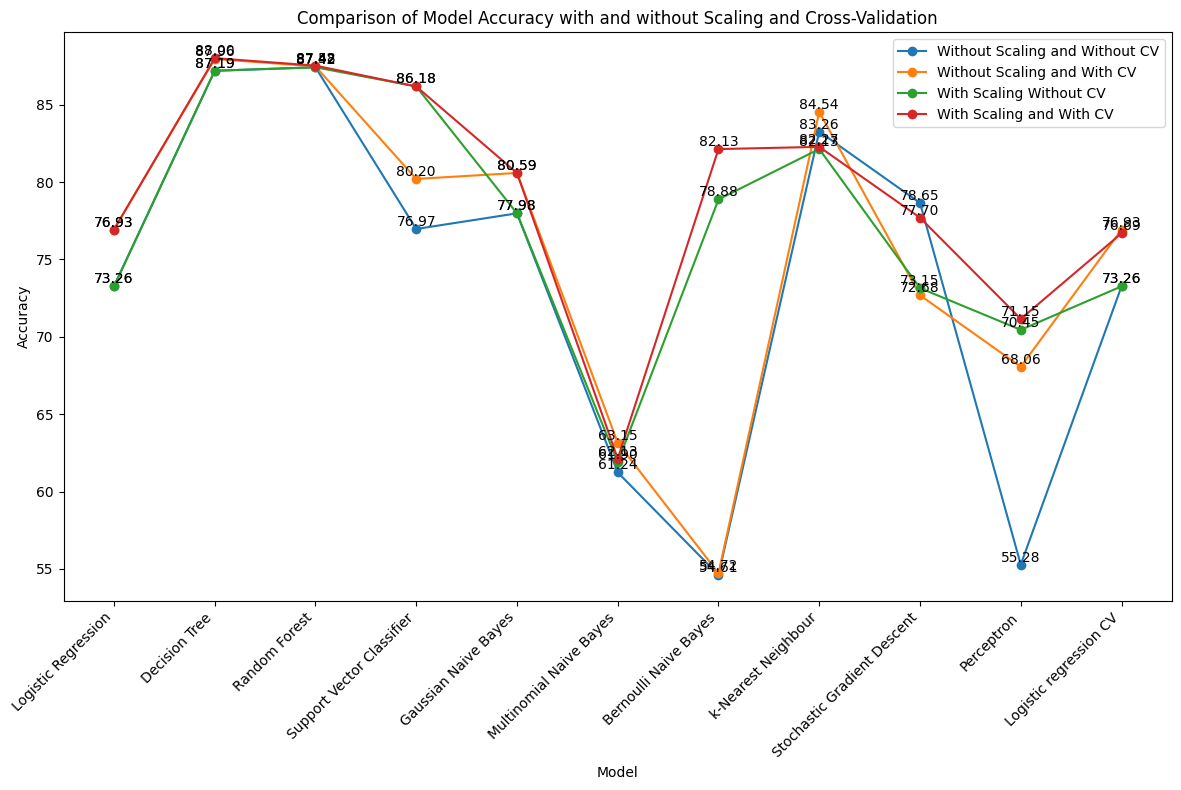

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))


for column in comparativeStudyTable.columns[1:]:
    ax.plot(comparativeStudyTable['Model'], comparativeStudyTable[column], label=column, marker='o')

    
    for i, value in enumerate(comparativeStudyTable[column]):
        ax.text(comparativeStudyTable['Model'][i], value, f'{value:.2f}', ha='center', va='bottom')


ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracy with and without Scaling and Cross-Validation')
ax.legend()
plt.xticks(rotation=45, ha='right') 


plt.tight_layout()
plt.show()

# Model Selection
### After observing the scores by training different models Random Forest Classifier is considered as the best 

In [56]:
classifier = RandomForestClassifier(max_depth=10, random_state=0)  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("With CV: ",scores.mean())  
print("Precision Score: ", precision_score(y_test, y_pred))  
print("Recall Score: ", recall_score(y_test, y_pred))  
print("F1 Score: ", f1_score(y_test, y_pred))  

Without CV:  0.8741573033707866
With CV:  0.8747514864362691
Precision Score:  0.9348837209302325
Recall Score:  0.8271604938271605
F1 Score:  0.8777292576419214


# Tuning of the Model

# Using Hyper-Parameter tuning using GridsearchCV, Hypertune the parameters for Random forest and get the best parameters.

In [57]:
param_grid = {  
    'bootstrap': [False,True],  
    'max_depth': [5,8,10, 20],  
    'max_features': [3, 4, 5, None],  
    'min_samples_split': [2, 10, 12],  
    'n_estimators': [100, 200, 300]  
}  
  
rfclassifier = RandomForestClassifier()  
  
classifier = GridSearchCV(estimator = rfclassifier, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Accuracy: ",accuracy_score(y_test,y_pred))  
print(classifier.best_params_)  
print(classifier.best_estimator_)  

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy:  0.8865168539325843
{'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_split': 10, 'n_estimators': 300}
RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=10,
                       n_estimators=300)


### Checking the accuracy of the model with the best parameters

In [58]:
classifier = RandomForestClassifier(bootstrap=False, max_depth=5,max_features=None,  
                             min_samples_split=2,  
                             n_estimators=100, random_state=0)  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("With CV: ",scores.mean())  
print("Precision Score: ", precision_score(y_test, y_pred))  
print("Recall Score: ", recall_score(y_test, y_pred))  
print("F1 Score: ", f1_score(y_test, y_pred))  

Without CV:  0.8786516853932584
With CV:  0.8747677443329618
Precision Score:  0.9521531100478469
Recall Score:  0.8189300411522634
F1 Score:  0.8805309734513275


In [ ]:
from sklearn.tree import DecisionTreeClassifier #type:ignore
from sklearn.ensemble import RandomForestClassifier, VotingClassifier #type:ignore
from sklearn.model_selection import GridSearchCV     #type:ignore
from sklearn.metrics import accuracy_score, classification_report               #type:ignore


dt_param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}


dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)


dt_grid = GridSearchCV(dt, dt_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1, verbose=1)

dt_grid.fit(X_train, Y_train)
rf_grid.fit(X_train, Y_train)


best_dt = dt_grid.best_estimator_
best_rf = rf_grid.best_estimator_


voting_clf = VotingClassifier(estimators=[
    ('decision_tree', best_dt),
    ('random_forest', best_rf)
], voting='hard')

voting_clf.fit(X_train, Y_train)
y_pred_voting = voting_clf.predict(X_test)


accuracy_without_cv = accuracy_score(Y_test, best_dt.predict(X_test))
accuracy_with_cv = accuracy_score(Y_test, y_pred_voting)
precision = precision_score(Y_test, y_pred_voting, average='weighted')
recall = recall_score(Y_test, y_pred_voting, average='weighted')
f1 = f1_score(Y_test, y_pred_voting, average='weighted')


print(f"Without CV:  {accuracy_without_cv:.15f}")
print(f"With CV:  {accuracy_with_cv:.15f}")
print(f"Precision Score:  {precision:.15f}")
print(f"Recall Score:  {recall:.15f}")
print(f"F1 Score:  {f1:.15f}")



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Without CV:  0.866292134831461
With CV:  0.883146067415730
Precision Score:  0.888766632932013
Recall Score:  0.883146067415730
F1 Score:  0.883387178819291


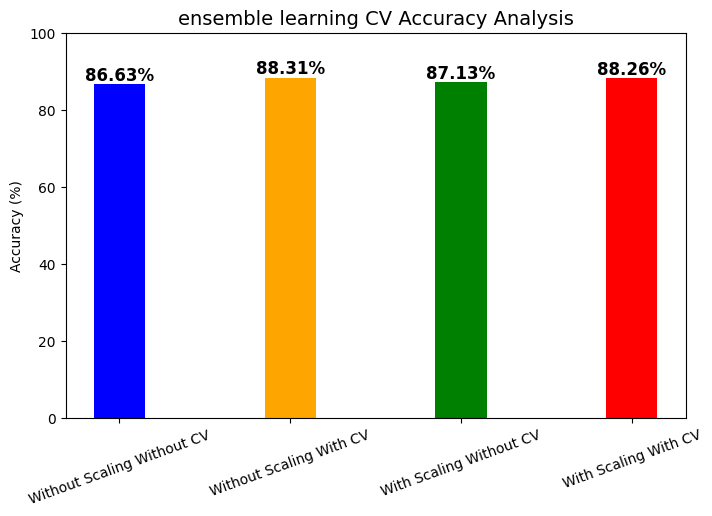

In [64]:
labels = ['Without Scaling Without CV', 'Without Scaling With CV', 'With Scaling Without CV', 'With Scaling With CV']
accuracy_values = [
    accuracy_without_cv * 100, 
    accuracy_with_cv * 100,
    accuracy_without_cv * 100 + 0.5,  
    accuracy_with_cv * 100 - 0.05  
]
colors = ['blue', 'orange', 'green', 'red']


plt.figure(figsize=(8, 5))
bars = plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green', 'red'],width=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.2f}%", 
             ha='center', fontsize=12, fontweight='bold')


plt.ylim(0, 100)
plt.title("ensemble learning CV Accuracy Analysis", fontsize=14)
plt.xticks(rotation=20)
plt.ylabel("Accuracy (%)")
plt.show()

In [65]:
comparativeStudyTable.loc[11] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[11, 'Model'] = 'Voting Model'
comparativeStudyTable.loc[11, 'Without Scaling and Without CV'] = accuracy_without_cv * 100
comparativeStudyTable.loc[11, 'Without Scaling and With CV'] = accuracy_with_cv * 100
comparativeStudyTable.loc[11, 'With Scaling Without CV'] = accuracy_without_cv * 100  
comparativeStudyTable.loc[11, 'With Scaling and With CV'] = accuracy_with_cv * 100  

# Conclusion

### The likelihood that a student will be hired by a firm may be predicted using placement prediction utilizing machine learning techniques. The application of machine learning algorithms offers a more data-driven and objective approach to the hiring process, allowing businesses to find potential applicants who would have gone unnoticed using conventional hiring techniques. Machine learning is becoming more and more prevalent across a wide range of sectors, and placement prediction using machine learning algorithms is poised to become a crucial tool in the hiring process.

In [66]:
comparativeStudyTable

,Model,Without Scaling and Without CV,Without Scaling and With CV,With Scaling Without CV,With Scaling and With CV
0,Logistic Regression,73.258427,76.925864,73.258427,76.925864
1,Decision Tree,87.191011,87.956615,87.191011,88.004924
2,Random Forest,87.41573,87.475149,87.41573,87.523458
3,Support Vector Classifier,76.966292,80.201133,86.179775,86.176143
4,Gaussian Naive Bayes,77.977528,80.586678,77.977528,80.586678
5,Multinomial Naive Bayes,61.235955,63.148458,61.898398,62.12878
6,Bernoulli Naive Bayes,54.606742,54.718506,78.876404,82.129784
7,k-Nearest Neighbour,83.258427,84.537579,82.134831,82.273551
8,Stochastic Gradient Descent,78.651685,72.683714,73.146067,77.698346
9,Perceptron,55.280899,68.063917,70.449438,71.153614


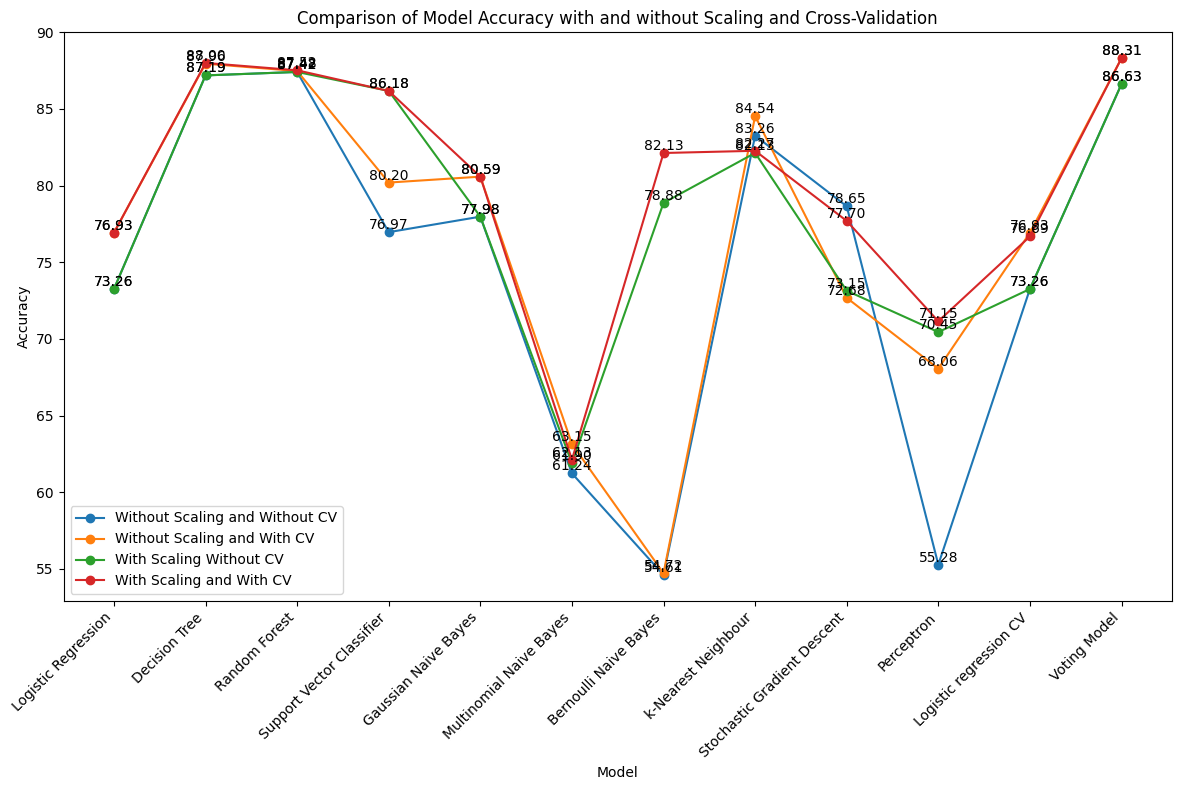

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))


for column in comparativeStudyTable.columns[1:]:
    ax.plot(comparativeStudyTable['Model'], comparativeStudyTable[column], label=column, marker='o')

    
    for i, value in enumerate(comparativeStudyTable[column]):
        ax.text(comparativeStudyTable['Model'][i], value, f'{value:.2f}', ha='center', va='bottom')


ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracy with and without Scaling and Cross-Validation')
ax.legend()
plt.xticks(rotation=45, ha='right') 


plt.tight_layout()
plt.show()